In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
intel = pd.read_csv('inteldata.csv')
intel = intel.drop(['Unnamed: 0'], axis=1)
intel

,sdate,stime,epoch,moteid,temp,humidity,light,voltage
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964
...,...,...,...,...,...,...,...,...
2313677,2004-04-02,01:14:54.164318,61274,NaN,NaN,NaN,NaN,NaN
2313678,2004-04-02,01:17:53.670524,61275,NaN,NaN,NaN,NaN,NaN
2313679,2004-04-02,01:20:52.807972,61276,NaN,NaN,NaN,NaN,NaN
2313680,2004-04-02,01:26:53.950342,61278,NaN,NaN,NaN,NaN,NaN


In [3]:
intel['moteid'] = intel['moteid'].astype(object)
motesummarydtd = intel[{'sdate','moteid','temp','humidity','light','voltage'}]
motesummarydtd

,humidity,light,temp,voltage,moteid,sdate
0,-3.91901,11.04,122.1530,2.03397,1,2004-03-31
1,37.09330,45.08,19.9884,2.69964,1,2004-02-28
2,38.46290,45.08,19.3024,2.68742,1,2004-02-28
3,38.80390,45.08,19.1652,2.68742,1,2004-02-28
4,38.83790,45.08,19.1750,2.69964,1,2004-02-28
...,...,...,...,...,...,...
2313677,NaN,NaN,NaN,NaN,NaN,2004-04-02
2313678,NaN,NaN,NaN,NaN,NaN,2004-04-02
2313679,NaN,NaN,NaN,NaN,NaN,2004-04-02
2313680,NaN,NaN,NaN,NaN,NaN,2004-04-02


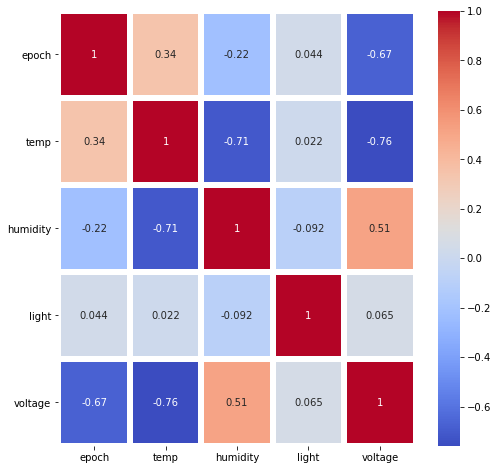

In [4]:
sns.heatmap(intel.corr(),annot=True,cmap='coolwarm',linewidth=5)
fig=plt.gcf() #method to make heatmap
fig.set_size_inches(8,8)

In [5]:
final = motesummarydtd.groupby(['sdate','moteid']).agg(meantemp =  ('temp', 'mean'),
                           medhumidity = ('humidity', 'mean'),
                           meanlight =  ('light', 'mean'),
                           meanvoltage = ('voltage', 'mean'),
                           maxvoltage = ('voltage', 'mean'),
                           count=   ('moteid', 'count')).reset_index()
final.fillna(0, inplace=True)
final

,sdate,moteid,meantemp,medhumidity,meanlight,meanvoltage,maxvoltage,count
0,2004-02-28,1.0,21.005487,35.888716,175.619408,2.710136,2.710136,1317
1,2004-02-28,2.0,20.653947,36.251354,213.939634,2.678726,2.678726,1149
2,2004-02-28,3.0,20.703610,36.603421,156.593533,2.696685,2.696685,1602
3,2004-02-28,4.0,20.897784,37.089357,190.258510,2.672143,2.672143,1906
4,2004-02-28,5.0,0.000000,0.000000,0.000000,2.669458,2.669458,10
...,...,...,...,...,...,...,...,...
1655,2004-04-03,34.0,-38.400000,33.304767,1847.360000,1.877793,1.877793,3
1656,2004-04-03,58.0,25.014983,32.020783,27.462000,2.703037,2.703037,120
1657,2004-04-04,58.0,22.098667,35.386300,32.251111,2.593648,2.593648,9
1658,2004-04-05,56.0,23.797191,34.915146,0.886231,2.816561,2.816561,46


In [47]:
X = final.drop(['sdate','moteid','medhumidity','meanlight','maxvoltage','count'], axis=1)
X

,meantemp,meanvoltage
0,21.005487,2.710136
1,20.653947,2.678726
2,20.703610,2.696685
3,20.897784,2.672143
4,0.000000,2.669458
...,...,...
1655,-38.400000,1.877793
1656,25.014983,2.703037
1657,22.098667,2.593648
1658,23.797191,2.816561


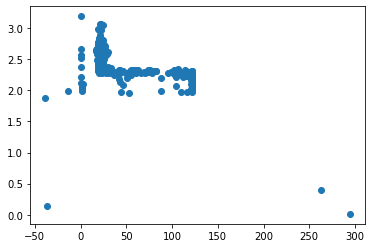

In [48]:
plt.scatter(final['meantemp'],final['meanvoltage'])

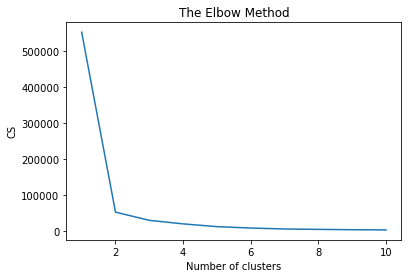

In [37]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1660, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[['meantemp','meanvoltage']] = scaler.fit_transform(X[['meantemp','meanvoltage']])

In [58]:
kmeans = KMeans(n_clusters=3,  n_init=900, max_iter=1660, random_state=0) 
kmeans.fit(X)
predict=kmeans.predict(X)
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [59]:
silhouette_avg = metrics.silhouette_score(X, kmeans.labels_)
silhouette_avg

0.9673911367843375

In [60]:
X[['meantemp','meanvoltage']] = scaler.inverse_transform(X[['meantemp','meanvoltage']])

In [61]:
X['cluster'] = pd.Series(predict, index=X.index)
X.to_csv(r'C:\Users\prash\Desktop\Data Science Projects\Intel Clustering of Sensors\Intel-Final-Data.csv', index = False)
X

,meantemp,meanvoltage,cluster
0,21.005487,2.710136,2
1,20.653947,2.678726,2
2,20.703610,2.696685,2
3,20.897784,2.672143,2
4,0.000000,2.669458,2
...,...,...,...
1655,-38.400000,1.877793,0
1656,25.014983,2.703037,2
1657,22.098667,2.593648,2
1658,23.797191,2.816561,2


In [62]:
X.groupby('cluster').mean()

,meantemp,meanvoltage
cluster,,
0,23.499758,2.409259
1,121.161907,2.170784
2,21.920682,2.628328


In [63]:
kmeans.inertia_

3.374902418350946

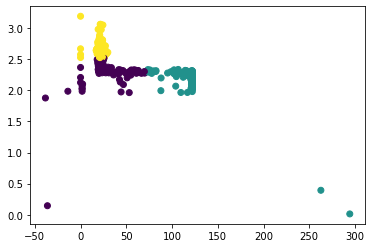

In [64]:
plt.scatter(X['meantemp'],X['meanvoltage'],c=X['cluster'])